#### Applied Artificial Intelligence 2023/2024
#### 771767_A23_T2
#### SULAIMAN ADELEYE SHINA
#### PROJECT
#### STUDENT NUMBER:


##### Description


For this assignment you need to build a natural language processing (NLP) application and produce a report about it. You should train it on publicly available data, it is allowed to use data from the workshops if you are having difficulty finding your own public dataset online. It is not necessarily recommended though; choose a dataset you find best helps you to fulfil the grading rubric.
week

**OVERVIEW OF TASKS**

**_The coding for the project should be undertaken in the Python programming language._

*_
Produce a Jupyter notebook containing Python code, equations, results, and visualisations (plots, figures graphs.)_.

*_
Produce a 3000-word report following the criteria below. The report should also contain visualisations  (plots, figures graphs), but no pythonce__
***_.
The NLP application should contain two traditional machine learning methods/models (such as Naive Bayes and clustering) and two deep learning methods/models (such as a standard RNN, an LSTM, and a transforme_r).darker side
.”_

**For comparison, here is an example of a *NEGATIVE* review:**

In [1]:
import pandas as pd
import os
import sys
import re
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
#import matplotlib.pyplot as plt and seaborn for visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import gensim
import spacy

from worldcloud import WordCLoud

from gensim.utils import simple_preprocess

In [2]:
# In addition I am using a few specialised libraries that deal with text processing.

In [3]:
# pip install -U gensim

In [4]:
# regular expressions for removing special characters, such as punctuation
import re

In [5]:
# gensim is a library for text processing including n-gram models
import gensim


In [6]:
from gensim.utils import simple_preprocess


In [7]:
# !pip install jiwer
# !pip install gradio typing-extensions

In [8]:
# spacy is also for text processing, here we are using the lemmatiser
import spacy

In [9]:
# This package draws word clouds, as a form of frequency analysis
# !pip install wordcloud

The !pip command is used to install a package that is not already present in Colab. Here I am 
installed a package for producing word clouds based on the frequency of terms in my text.



Next, mount Google Drive and (if using Colab) and read in the data using pandas.


In [10]:
df = pd.read_csv('IMDB Dataset.csv')

In [11]:
imdb_df = df

In [12]:
imdb_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
print(imdb_df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


I am getting the following output from this - 2 columns, one with review text and the other with 
sentiment, either positive or negative. My table has 50,000 rows.

**Removing special characters and converting to lower case —** With my data read in, I can see 
several issues that may impact classification and text analysis. This includes upper case and lower 
case letters (they may get mistaken for separate tokens and therefore make my language model 
even more sparse), special characters such as the HTML tags <br> and </br> and various other 
punctuation marks that are likely not going to contribute to sentiment classification.

The following code will help me address this. We use the re package imported earlier to use 
regular expressions to get rid of a set of punctuation marks and to convert all text to lower case. We 
then print the head (first bit) of our table to see the result. 

#### Clean data ...

The map and lambda function in the code below is used to apply the same operation to each element in a 
sequential input, here our imdb_df[‘review’] texts, where each individual element (review) is 
referred to as x within the bounds of the function. See here for other examples.
Try to change the regular expressions, e.g. add additional special characters or remove some, to see 
differently formatted text.

In [14]:
# Clean data ... 
# Remove punctuation
imdb_df['review'] = imdb_df['review'].apply(str).map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
imdb_df['review'] = imdb_df['review'].apply(str).map(lambda x: x.lower())
# Print out the first rows of reviews
print(imdb_df['review'].apply(str).head())

0    one of the other reviewers has mentioned that ...
1    a wonderful little production <br /><br />the ...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object


From this code I get the above output.
If you compare this with the previous output, you will see the text changes applied.

**Tokenisation—** As a next step, I want to convert my text from lists of sentences to lists of lists of 
words. In other words, I want to represent my inputs not as complete sentences but as collections of 
words. This will help analysis as I can then start counting words, identifying classes of words, 
lemmatising them (i.e. representing them in their base rather than inflected form — dog instead of 
dogs, good instead of better, walk instead of walking etc.). Lemmatisation has a similar advantage as 
converting to lower case - it reduces the overall amounts of tokens and therefore reduces the 
sparsity of my dataset.

This code will initially perform the tokenisation of my data. NB if you put deacc=True it will remove 
punctuation too - but we’ve already done this, so I left it as False.

In [15]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False)) #deacc=True removes punctuations
#data = imdb_df['review'].tolist()
data = imdb_df['review'][0:500].tolist()
data_words = list(sent_to_words(data))
print('data_words[:1]', data_words[:1])

data_words[:1] [['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', 'oz', 'episode', 'you', 'll', 'be', 'hooked', 'they', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', 'br', 'br', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', 'trust', 'me', 'this', 'is', 'not', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'word', 'br', 'br', 'it', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'it', 'focuses', 'mainly', 'on', 'emerald', 'city', 'an', 'experimental', 'section', 'of', 'the', 'prison',

Running this gives me the above output (just the first bit is shown, it’s a long list)

Note that this bit of the code (and the one we are going to write next) can take while to come 
through - so if you just want to test, you could clip the dataset here (see the commented bit above). 
This will use only 500 data rows from here onwards. It’s not ideal for the full analysis, but sometimes 
good to just test and debug code.

**Unigrams, bigrams and trigrams —** Next we can train some simple n-gram-based language models. 
Strictly speaking the tokenisation process has already given us a set of unigrams. The gensim library 
we imported earlier can help us extract bigrams and trigrams from our text.

In [16]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
print('bigram',bigram)
print('bigram data',bigram[data_words])
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
print('trigram',trigram)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
bigram_mod.save("bigram_mod")
trigram_mod.save("trigram_mod")
bigram_mod = gensim.models.Phrases.load("bigram_mod")
trigram_mod = gensim.models.Phrases.load("trigram_mod")

bigram Phrases<81954 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
bigram data <gensim.interfaces.TransformedCorpus object at 0x000001903D4DFA10>
trigram Phrases<82073 vocab, min_count=5, threshold=100, max_vocab_size=40000000>


This bit of code trains a first set of bigrams from our tokenised (and otherwise pre-processed) data. 
The min_count threshold sets a lower threshold for how many instances of a bigram phrase we 
need to find before including it into our model. Increasing this parameter will lead to fewer bigrams. 
Decreasing it will find more, but also increase the sparsity in our dataset. The threshold parameter is 
dependent on the scoring function, see here (https://radimrehurek.com/gensim/models/phrases.html) for details. In simple terms, a higher threshold means 
fewer phrases will get found - presumably in such as way that they are more “meaningful” to the text 
/ task at hand.


Printing off the bigrams and trigrams using this code, 

In [17]:
for bigram in bigram_mod.phrasegrams.keys():
    print(bigram)

serial_killer
new_york
ve_seen
at_least
low_budget
year_old
reminds_me
ever_seen
high_school
special_effects
character_development
subject_matter
civil_war
cold_mountain
halfway_through
second_half
fast_forward
hong_kong
each_other
my_opinion
found_myself
years_ago
small_town
theme_song
rock_roll
star_trek
sit_through
sci_fi
huge_fan
jane_austen
anne_rice
new_world
pretty_woman
jackie_chan
throw_momma
gentleman_jim
ghost_stories
skeleton_dance
miss_dunne
bug_life


In [18]:
for trigram in trigram_mod.phrasegrams.keys():
    print(trigram) 

serial_killer
looking_forward
ve_seen
at_least
low_budget
year_old
reminds_me
ever_seen
high_school
special_effects
character_development
subject_matter
civil_war
cold_mountain
second_half
fast_forward
each_other
my_opinion
in_my_opinion
found_myself
years_ago
small_town
theme_song
rock_roll
sit_through
huge_fan
jane_austen
anne_rice
new_world
pretty_woman
jackie_chan
throw_momma
gentleman_jim
ghost_stories
skeleton_dance
miss_dunne
bug_life


I get the following output **for bigrams** (just the first bits copied over). As you can see it contains a 
number of interesting phrases, including “serial killer” which seems to make sense for a movies 
data, place names such as New York and Hong Kong, frequently co-occurring words such as 
“reminds me”, “fast forward” and other things. Looking at this list, it seems to make sense to 
represent these items together as “meaning units”.

**For trigrams** I get the following - which looks like a mixture of bigrams and trigrams — i.e. bigrams 
identified earlier with another word added to them, if it occurred frequently enough. This again 
makes sense seen that we initialised the trigram model above from the existing bigrams.

In the result we get a few interesting things like “‘reminds me of”, “the second half” or “second half 
of”. Overall these seem less interesting perhaps than the bigrams, though can be powerful when 
measuring grammaticality of automatically generated language.

With our n-grams in hand, let’s move on to lemmatise and remove stop words.

**Lemmatisation and stop words —** In this section I will remove stop words from my text using the 
following piece of code. You will see that gensim again has functionality for this.

In [19]:
from gensim.parsing.preprocessing import STOPWORDS
my_stop_words = STOPWORDS.union(set(['br']))
# Define functions for stopwords, bigrams, trigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in my_stop_words] for doc in texts]

In [20]:
from gensim.models.phrases import Phrases, Phraser
# from gensim.utils import lemmatize
# from gensim.utils import lemmatize
# from gensim.parsing.preprocessing import lemmatize
#def remove_stopwords(texts):
 #   return [word for word in text if word not in STOPWORDS]
 
def make_bigrams(texts):
    bigram = Phrases(texts, min_count=5, threshold=100)
    bigram_phraser = Phraser(bigram)
    return [bigram_phraser[doc] for doc in texts]
 
def make_trigrams(texts):
    bigram = Phrases(texts, min_count=5, threshold=100)
    bigram_phraser = Phraser(bigram)
    trigram = Phrases(bigram_phraser[texts], threshold=100)
    trigram_phraser = Phraser(trigram)
    return [trigram_phraser[bigram_phraser[doc]] for doc in texts]
 
def lemmatize_text(text):
    lemmatized_text = []
    for token in lemmatize(' '.join(text)):
        if token.decode().split('/')[0] != 'user':
            lemmatized_text.append(token.decode().split('/')[0])
    return lemmatized_text

In [21]:
# Define functions for stopwords, bigrams, trigrams and lemmatisation
# def make_bigrams(texts):
  #  return [[word for word in simple_preprocess(str(doc)) if word not in my_stop_words] for doc in texts]

In [22]:
# Define functions for stopwords, bigrams, trigrams and lemmatisation
# def remove_stopwords(texts):
  #  return [[word for word in simple_preprocess(str(doc)) if word not in my_stop_words] for doc in texts]

One interesting thing one can do here is to modify the existing list of stop words with additional 
tokens that may be relevant to the domain. In this case, I am adding “br” and “film”. I didn’t test here 
if these are a good idea to remove but my intuition is that “film” (and probably “movie”) will occur 
frequently without adding much distinguishing content for a sentiment analyser on film reviews. The 
other bit “br” is almost certainly irrelevant as it just denotes the HTML new line tag.



I then run the following - removing all tokens from the my updated stop words list from my data.

In [23]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [24]:
data_words_nostops

[['reviewers',
  'mentioned',
  'watching',
  'oz',
  'episode',
  'll',
  'hooked',
  'right',
  'exactly',
  'happened',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scenes',
  'violence',
  'set',
  'right',
  'word',
  'trust',
  'faint',
  'hearted',
  'timid',
  'pulls',
  'punches',
  'regards',
  'drugs',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'word',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focuses',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cells',
  'glass',
  'fronts',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'manyaryans',
  'muslims',
  'gangstas',
  'latinos',
  'christians',
  'italians',
  'irish',
  'moreso',
  'scuffles',
  'death',
  'stares',
  'dodgy',
  'dealings',
  'shady',
  'agreements',
  'far',
  'away',
  'main',
  'appeal',
  'fact',
  'goes',
  'shows',
  

In [25]:
data_words_bigrams

[['reviewers',
  'mentioned',
  'watching',
  'oz',
  'episode',
  'll',
  'hooked',
  'right',
  'exactly',
  'happened',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scenes',
  'violence',
  'set',
  'right',
  'word',
  'trust',
  'faint',
  'hearted',
  'timid',
  'pulls',
  'punches',
  'regards',
  'drugs',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'word',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focuses',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cells',
  'glass',
  'fronts',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'manyaryans',
  'muslims',
  'gangstas',
  'latinos',
  'christians',
  'italians',
  'irish',
  'moreso',
  'scuffles',
  'death',
  'stares',
  'dodgy',
  'dealings',
  'shady',
  'agreements',
  'far',
  'away',
  'main',
  'appeal',
  'fact',
  'goes',
  'shows',
  

You will notice that I am also obtaining a new set of bigrams. This relies on the following function, 
which uses my earlier bigram model and applies it to the new data with stop words removed. 

In [26]:
# Code From the WOrkShop
# def make_bigrams(texts):
#  return [bigram_mod[doc] for doc in texts]
# def make_trigrams(texts):
#  return [trigram_mod[bigram_mod[doc]] for doc in texts]

**Note** that I could have trained trigrams here but decided to go for bigrams based on my earlier 
inspection of the two models.

Next, I use the Spacy library to train a lemmatiser from my bigram data. As discussed earlier, a 
lemmatiser converts words to their base form. I am allowing only nouns, adjectives, verbs and 
adverbs to be considered here as they tend to be the main meaning-bearing words in English. It’s 
unlikely that a preposition or conjunction will help be predict the sentiment of a review.

In [27]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        return texts_out

I can apply this function as follows:

In [28]:
#! python -m spacy download en_core_web_sm

In [29]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print('data_lemmatized[:1]', data_lemmatized[:1])

data_lemmatized[:1] [['reviewer', 'mention', 'watch', 'episode', 'hook', 'right', 'exactly', 'happen', 'thing', 'strike', 'brutality', 'unflinche', 'scene', 'violence', 'set', 'right', 'word', 'trust', 'faint', 'hearted', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'call', 'nickname', 'give', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privacy', 'high', 'agenda', 'home', 'muslim', 'italian', 'irish', 'moreso', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'far', 'away', 'main', 'appeal', 'fact', 'go', 'show', 'forget', 'pretty', 'picture', 'paint', 'mainstream', 'audience', 'forget', 'charm', 'romanceoz', 'mess', 'episode', 'see', 'strike', 'nasty', 'surreal', 'ready', 'watch', 'develop', 'taste', 'get', 'accustom', 'high', 'level', 'graphic', 'violence', 'violence', 'injustice', 'crook', 'guard', 'sell', 'ni

And we will have the the above output when printed to the console (just the first bit of a long list):

You should see the difference clearly between the earlier inflected word forms and the lemmatised 
output now

This kind of representation should make it easier to apply machine learning techniques as they preprocessed our language data in such as way to make abstractions as possible as can be.

**Frequency and Visualisation —** As final step in the guided bit of this tutorial, I will generate a word 
cloud from our lemmatised data to visualise the most frequent terms. Word clouds get initialised in 
different ways when you run them, so I’ll generate two for comparison.

I’ll use this code which I got from the WordCloud library GitHub page(https://github.com/amueller/word_cloud).

In [30]:
from wordcloud import WordCloud

In [31]:
def getWordCloud(hashtags):
    # Read the whole text.
    text = ' '.join(hashtags)
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)
    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig('wordcloud_all.pdf', dpi=500) 
    plt.show()
    

It expects strings as input, so I’ll need to briefly loop over my data again to convert it to a format it 
will accept. Afterwards, I’ll get two word clouds as printed below. 

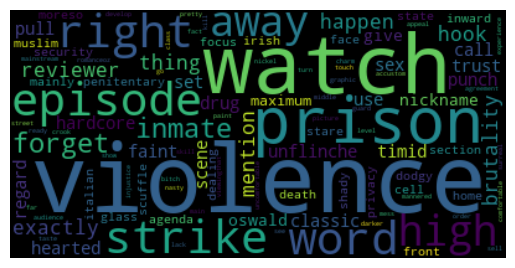

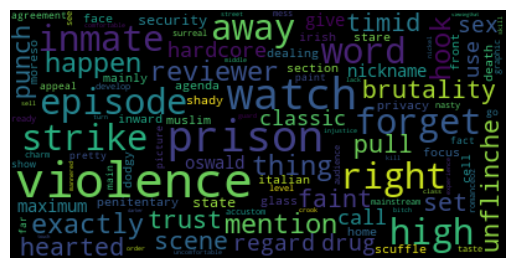

In [32]:
s = []
for l in data_lemmatized:
    t = ' '.join(l)
    s.append(t)
    
getWordCloud(s)

Looking at these, I want to go back and add “movie” to my stop list I think, but at the same time it is 
a good indicator that it picks up some of the contents in the data.

#### Part 2 - Sentiment Analysis

This part of the practical work will be less guided. Using the new text, data_lemmatized and the 
sentiment labels in the original data_frame, train a sentiment classifier using e.g. sk_learn’s
MultiNominal Naive Bayes classifier:

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [34]:
# Convert the List of lemmatized data to DF
dfLemmatized = pd.DataFrame(data, columns = ['data_lemmatized'])

# Display the DataFrame
dfLemmatized

,data_lemmatized
0,one of the other reviewers has mentioned that ...
1,a wonderful little production <br /><br />the ...
2,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."
...,...
495,"""american nightmare"" is officially tied in my ..."
496,first off i have to say that i loved the book ...
497,this movie was extremely boring i only laughed...
498,i was disgusted by this movie no it wasn't bec...


In [35]:
x = dfLemmatized['data_lemmatized']
y = imdb_df['sentiment'][:500]
# data['data_lemmatized'] = s
# feature = data['data_lemmatized']
# targ = data['sentiment']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Split the data into y=training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.33, shuffle=True, random_state=42)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
count_vect = CountVectorizer()
# vectorizer = TfidfVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)
# X_train_counts.shape

In [57]:
X_train_counts

<335x10426 sparse matrix of type '<class 'numpy.int64'>'
	with 48963 stored elements in Compressed Sparse Row format>

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
# Initialize the Multinomial Naive Bayes Classifier
classifier = MultinomialNB()

In [60]:
# Train the classifier
classifier.fit(X_train_counts, y_train)

MultinomialNB()

In [ ]:
# Predict sentiment labels for the test set
y_pred = clf.predict(X_test)

In [43]:
# # from sklearn.datasets import fetch_20newsgroups
# data_train = data_lemmatized(subset='train',
#     feature=feature, shuffle=True, random_state=42)

In [ ]:
# data_train.target_names

In [ ]:
# len(data_train.data)
# len(data_train.filenames)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(data_train.data)
# X_train_counts.shape

In [ ]:
# categories = ['alt.atheism', 'soc.religion.christian',
#               'comp.graphics', 'sci.med']

In [ ]:
# data_lemmatized

In [ ]:
# from sklearn.datasets import fetch_20newsgroups
# X_train, X_test, y_train, y_test = train_test_split(subset='train',
#     data_lemmatized=data_lemmatized, shuffle=True, random_state=42)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
 
# Assuming you have data_lemmatized and sentiment labels in data_frame
 
# Convert data_lemmatized to text
text_data = [' '.join(doc) for doc in data_lemmatized]
 
# Convert sentiment labels to numerical values (e.g., 0 for negative, 1 for positive)
sentiment_mapping = {'negative': 0, 'positive': 1}
labels = imdb_df['sentiment'].map(sentiment_mapping)

# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)
 

In [45]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=42)
 
# Train the Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)
 
# Predict sentiment labels for the test set
y_pred = clf.predict(X_test)
 
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [1, 50000]

In [ ]:
To evaluate your classifier, you may need to use sk_learn’s train_test_split function to split your 
dataset into a train and a test set. Doing this with 0.33 allocated for testing, I get an accuracy 0.60 
with my smaller dataset of 500 reviews. Using the full 50,000 reviews, I get 0.86. This would be a 
good baseline for other classifiers to build on top of

#### Part 3 - Feature analysis.

Data pre-processing and explorative analysis can also help us learn something about our data and 
domain. Try to associate specific features, themes, words, with positive and negative reviews. A 
simple way to do this is to use Pandas to split the imdb_df dataset into 2, one of the positive and 
one for negative review.

In [46]:
# Split the DataFrame into positive and negative reviews
positiveReviewsDF = imdb_df[imdb_df['sentiment'] == 'positive']
negativeReviewsDF = imdb_df[imdb_df['sentiment'] == 'negative']

In [47]:
negativeReviewsDF

,review,sentiment
3,basically there's a family where a little boy ...,negative
7,this show was an amazing fresh & innovative id...,negative
8,encouraged by the positive comments about this...,negative
10,phil the alien is one of those quirky films wh...,negative
11,i saw this movie when i was about 12 when it c...,negative
...,...,...
49994,this is your typical junk comedy<br /><br />th...,negative
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [48]:
positiveReviewsDF

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production <br /><br />the ...,positive
2,i thought this was a wonderful way to spend ti...,positive
4,"petter mattei's ""love in the time of money"" is...",positive
5,probably my all-time favorite movie a story of...,positive
...,...,...
49983,i loved it having been a fan of the original s...,positive
49985,imaginary heroes is clearly the best film of t...,positive
49989,i got this one a few weeks ago and love it it'...,positive
49992,john garfield plays a marine who is blinded by...,positive


In [49]:
# Example exploratory analysis for positive reviews
positive_word_count = positiveReviewsDF['review'].str.split().apply(len)
positive_word_count

0        307
1        162
2        166
4        230
5        119
        ... 
49983    133
49985    216
49989    173
49992    170
49995    194
Name: review, Length: 25000, dtype: int64

In [50]:
positive_avg_word_count = positive_word_count.mean()
positive_avg_word_count

232.71056

In [51]:
positive_most_common_words = positiveReviewsDF['review'].str.split(expand=True).stack().value_counts().head(10)
positive_most_common_words

the     326351
and     172563
a       161074
of      151101
to      130234
is      111054
in       96516
it       74270
i        67025
this     66130
Name: count, dtype: int64

In [52]:
# Display results
print("Positive reviews:")
print("Average word count:", positive_avg_word_count)
print("Most common words:", positive_most_common_words)
 

Positive reviews:
Average word count: 232.71056
Most common words: the     326351
and     172563
a       161074
of      151101
to      130234
is      111054
in       96516
it       74270
i        67025
this     66130
Name: count, dtype: int64


In [53]:
# Exploratory analysis for negative reviews
negative_word_count = negativeReviewsDF['review'].str.split().apply(len)
negative_avg_word_count = negative_word_count.mean()
negative_most_common_words = negativeReviewsDF['review'].str.split(expand=True).stack().value_counts().head(10)


In [54]:
print("\nNegative reviews:")
print("Average word count:", negative_avg_word_count)
print("Most common words:", negative_most_common_words)


Negative reviews:
Average word count: 229.29428
Most common words: the     312687
a       155722
and     143389
of      136366
to      135515
is       98291
in       84968
this     77596
i        74934
it       74676
Name: count, dtype: int64


Running the rest of the code over the two datasets separately, can you identify any specific words, 
n-grams or other that may be indicative features of positive or negative sentiment?


*That’s it for today - next week we’ll learn about more recent & complex models to model language!*